In [72]:
import os
import sys
import math
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import audio_features as af

In [30]:
SAVE_FILE = True
DIR_NAME = "clustering_plots"
EXTENSION = "png"

In [31]:
def save_plot(filename):
    if SAVE_FILE:
        plt.savefig(DIR_NAME + "/" + filename + "." + EXTENSION, dpi=300, bbox_inches='tight')

In [4]:
SPOTIFY_DATASET = "spotify/genres_v2.csv"

In [10]:
spotify_df = pd.read_csv(
    SPOTIFY_DATASET
)
spotify_df.head()

c:\users\aruko\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [11]:
spotify_df.describe(include="all")

danceability        energy           key      loudness          mode  \
count   42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.639364      0.762516      5.370240     -6.465442      0.549462   
std         0.156617      0.183823      3.666145      2.941165      0.497553   
min         0.065100      0.000243      0.000000    -33.357000      0.000000   
25%         0.524000      0.632000      1.000000     -8.161000      0.000000   
50%         0.646000      0.803000      6.000000     -6.234000      1.000000   
75%         0.766000      0.923000      9.000000     -4.513000      1.000000   
max         0.988000      1.000000     11.000000      3.148000      1.000000   

         speechiness  acousticness  instrumentalness      liveness  \
count   42305.000000  42305.000000      42305.000000  42305.000000   
unique           NaN           NaN               NaN           NaN   
top              NaN           NaN               NaN           NaN   
freq             NaN           NaN               NaN           NaN   
mean        0.136561      0.096160          0.283048      0.214079   
std         0.126168      0.170827          0.370791      0.175576   
min         0.022700      0.000001          0.000000      0.010700   
25%         0.049100      0.001730          0.000000      0.099600   
50%         0.075500      0.016400          0.005940      0.135000   
75%         0.193000      0.107000          0.722000      0.294000   
max         0.946000      0.988000          0.989000      0.988000   

             valence  ...                      id  \
count   42305.000000  ...                   42305   
unique           NaN  ...                   35877   
top              NaN  ...  7D5qMGajdfznFcXFArk5VE   
freq             NaN  ...                       9   
mean        0.357101  ...                     NaN   
std         0.233200  ...                     NaN   
min         0.018700  ...                     NaN   
25%         0.161000  ...                     NaN   
50%         0.322000  ...                     NaN   
75%         0.522000  ...                     NaN   
max         0.988000  ...                     NaN   

                                         uri  \
count                                  42305   
unique                                 35877   
top     spotify:track:7D5qMGajdfznFcXFArk5VE   
freq                                       9   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                               track_href  \
count                                               42305   
unique                                              35877   
top     https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
freq                                                    9   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                             analysis_url    duration_ms  \
count                                               42305   42305.000000   
unique                                              35877            NaN   
top     https://api.spotify.com

In [12]:
genres_df = spotify_df["genre"]
spotify_df = spotify_df[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]
genres_df.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [142]:
genres_df_count = genres_df.reset_index().groupby("genre").count()
genres_df_count = genres_df_count.transpose()
genres_df_count

genre  Dark Trap   Emo  Hiphop  Pop   Rap   RnB  Trap Metal  Underground Rap  \
index       4578  1680    3028  461  1848  2099        1956             5875   

genre   dnb  hardstyle  psytrance  techhouse  techno  trance  trap  
index  2966       2936       2961       2975    2956    2999  2987

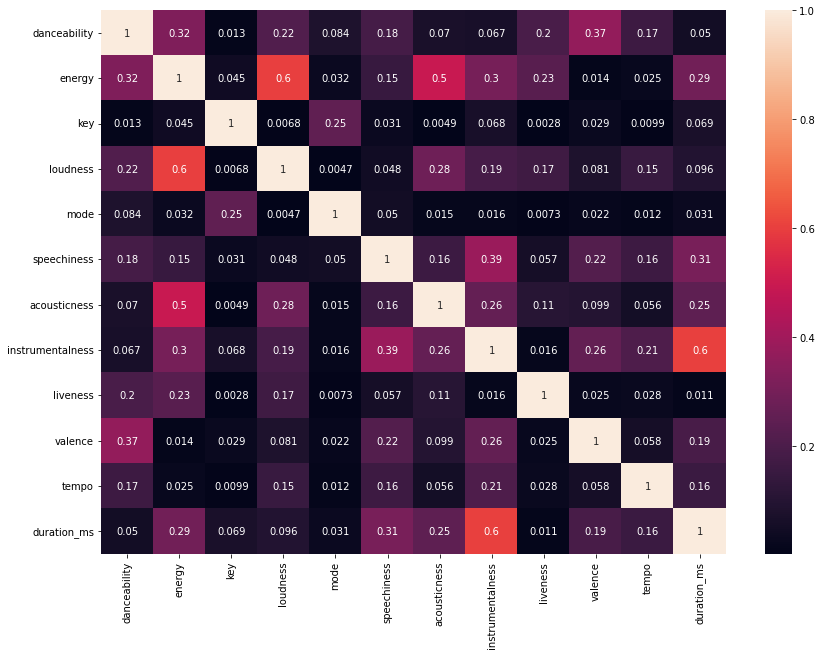

In [38]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(spotify_df.corr().abs(), annot=True, ax=ax)

save_plot("correlation_base")
plt.show()

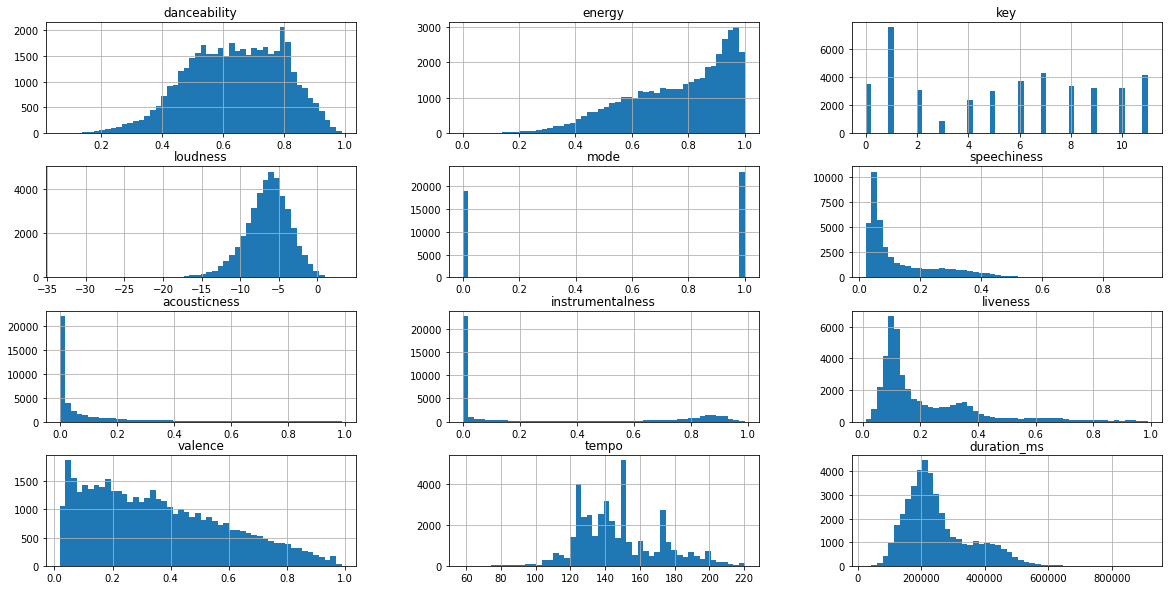

In [34]:
spotify_df[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]].hist(bins=50, figsize=(20,10))
save_plot("features_histogram")
plt.show()

In [21]:
columns_to_cluster = ['acousticness', 'danceability', 'energy',
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness']

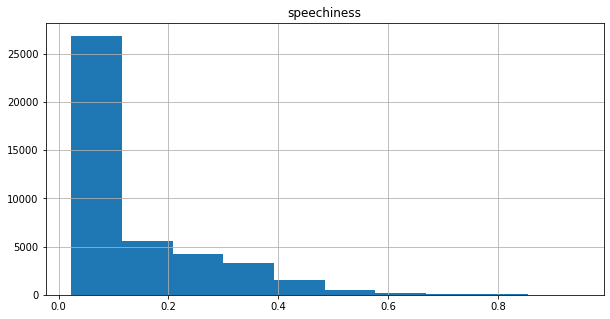

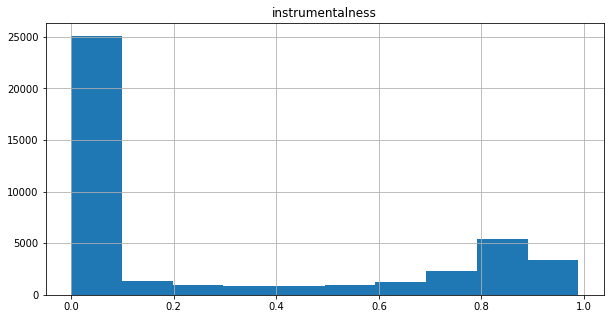

In [35]:
spotify_df[['speechiness']].hist(figsize=(10,5))
spotify_df[['instrumentalness']].hist(figsize=(10,5))
save_plot("speechiness_instrumentalness_hist")
plt.show()

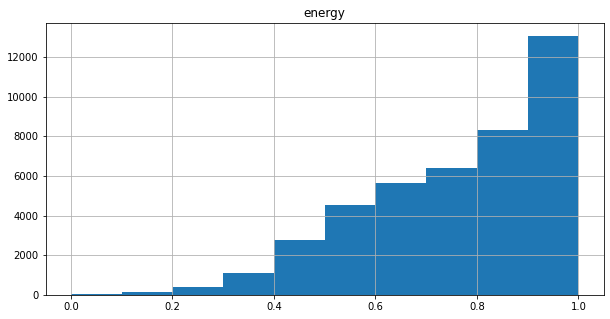

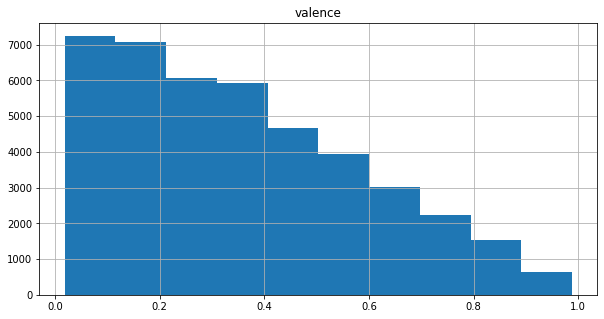

In [119]:
spotify_df[['energy']].hist(figsize=(10,5))
spotify_df[['valence']].hist(figsize=(10,5))
save_plot("VA_hist")
plt.show()

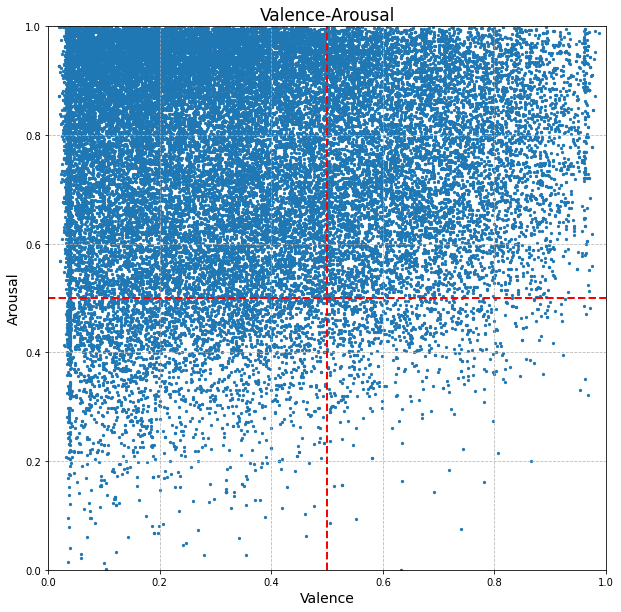

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(spotify_df[['valence']][:], spotify_df[['energy']][:], s=5)
xmin, xmax = plt.xlim(0, 1.0)
ymin, ymax = plt.ylim(0, 1.0)
plt.vlines(0.5, ymin, ymax, linestyle='dashed', colors=["red"], lw=2)
plt.hlines(0.5, xmin, xmax, linestyle='dashed', colors=["red"], lw=2)
plt.grid(alpha=0.9, linestyle='--')
plt.xlabel('Valence', size=14)
plt.ylabel('Arousal', size=14)
plt.title('Valence-Arousal', size=17)

save_plot("VA_scatter")

In [26]:
mms = MinMaxScaler()

spotify_scaled = mms.fit_transform(spotify_df[columns_to_cluster])
print("Scales: ", spotify_scaled[0,:])

Scales:  [0.0605253  0.82988406 0.81395479 0.01354904 0.0459429  0.38202827
 0.61000598 0.43030434 0.71203945]


In [27]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

spotify_scaled_df = pd.DataFrame(spotify_scaled, columns=columns_to_cluster_scaled)

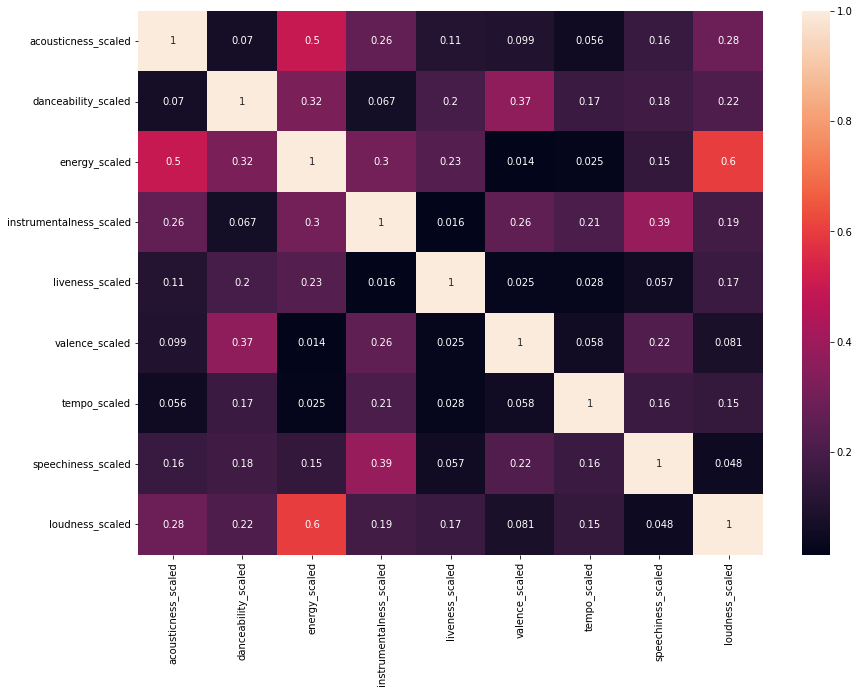

In [39]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(spotify_scaled_df.corr().abs(), annot=True, ax=ax)
save_plot("correlation_scaled_minmax")
plt.show()

In [153]:
n_clusters = range(2, len(genres_df.unique()))
wcss = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(spotify_scaled)
    preds = km.predict(spotify_scaled)
    centers = km.cluster_centers_
    wcss.append(km.inertia_)
    score = silhouette_score(spotify_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.3692413245867822
Number of Clusters = 3, Silhouette Score = 0.253687675067042
Number of Clusters = 4, Silhouette Score = 0.25491251922329083
Number of Clusters = 5, Silhouette Score = 0.2087085953387329
Number of Clusters = 6, Silhouette Score = 0.2022963131764721
Number of Clusters = 7, Silhouette Score = 0.20323403708481141
Number of Clusters = 8, Silhouette Score = 0.20113114006183058
Number of Clusters = 9, Silhouette Score = 0.19197413396478857
Number of Clusters = 10, Silhouette Score = 0.1728965235781606
Number of Clusters = 11, Silhouette Score = 0.1690851554134701
Number of Clusters = 12, Silhouette Score = 0.16622528441999254
Number of Clusters = 13, Silhouette Score = 0.16619273260975423
Number of Clusters = 14, Silhouette Score = 0.16891006630747496


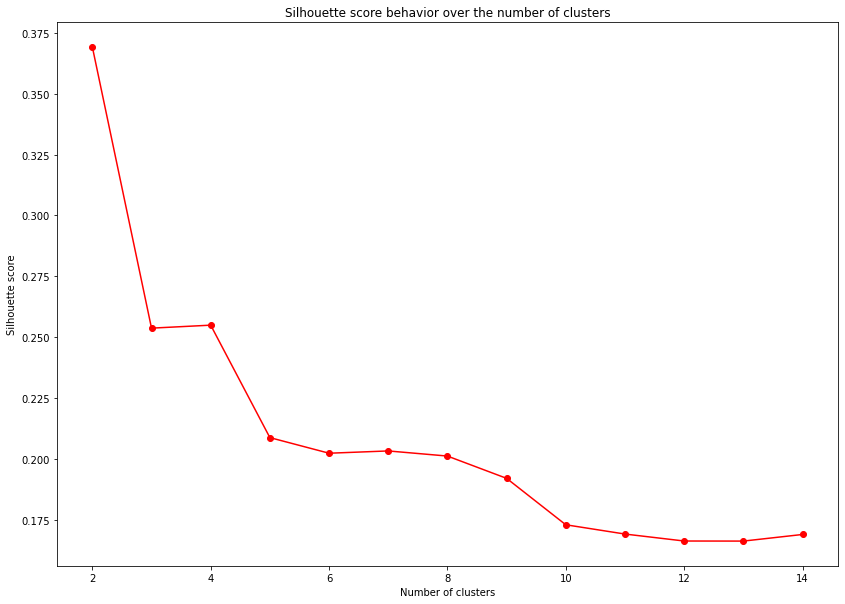

In [154]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
save_plot("silhouette_score")
plt.show()

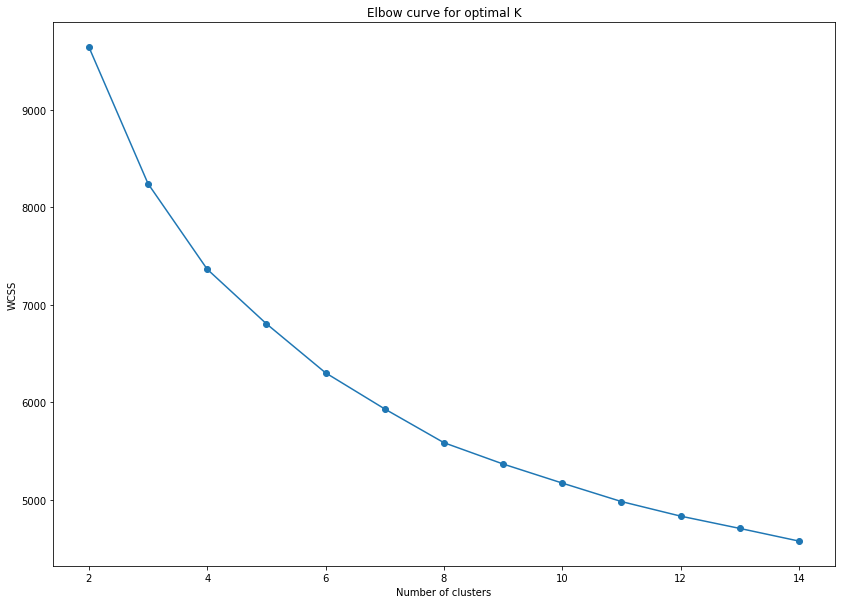

In [155]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, wcss, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve for optimal K')
plt.show()

In [65]:
k=6

model = KMeans(n_clusters=k, random_state=42).fit(spotify_scaled)
# pred = model.predict(spotify_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [3 0 2 2 4 3 3 3 3 4]


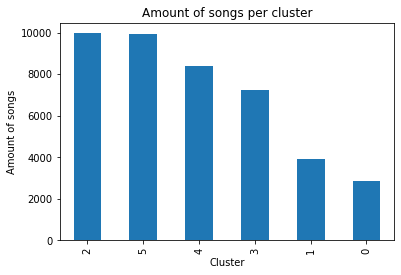

In [120]:
spotify_scaled_df["cluster"] = model.labels_

spotify_scaled_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
save_plot("spotify_clusters_amount")
plt.show()

In [69]:
display(spotify_scaled_df['cluster'].value_counts())
minor_cluster = spotify_scaled_df['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

2    9964
5    9916
4    8394
3    7258
1    3934
0    2839
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  2839


In [70]:
rename_columns = dict(zip(columns_to_cluster_scaled,columns_to_cluster))

df_radar = spotify_scaled_df.groupby('cluster')[columns_to_cluster_scaled].mean().reset_index().rename(columns=rename_columns)
df_radar

cluster  acousticness  danceability    energy  instrumentalness  liveness  \
0        0      0.597496      0.621734  0.488136          0.033233  0.152692   
1        1      0.021565      0.704239  0.862278          0.770270  0.168488   
2        2      0.035534      0.475345  0.879838          0.062718  0.280293   
3        3      0.095711      0.726258  0.579925          0.022325  0.147315   
4        4      0.111938      0.725204  0.743855          0.016531  0.201570   
5        5      0.035092      0.574158  0.832799          0.812544  0.217169   

    valence     tempo  speechiness  loudness  
0  0.356786  0.563235     0.159472  0.663515  
1  0.581819  0.477704     0.055545  0.726646  
2  0.246008  0.578940     0.121205  0.795677  
3  0.266632  0.540357     0.160063  0.704345  
4  0.666578  0.594273     0.200749  0.751040  
5  0.149858  0.521423     0.049541  0.713727

In [73]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    #ax = plt.subplot(4,ceil(num_clusters/4),row+1, polar=True, )
    ax = plt.subplot(2, math.ceil(num_clusters/2),row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

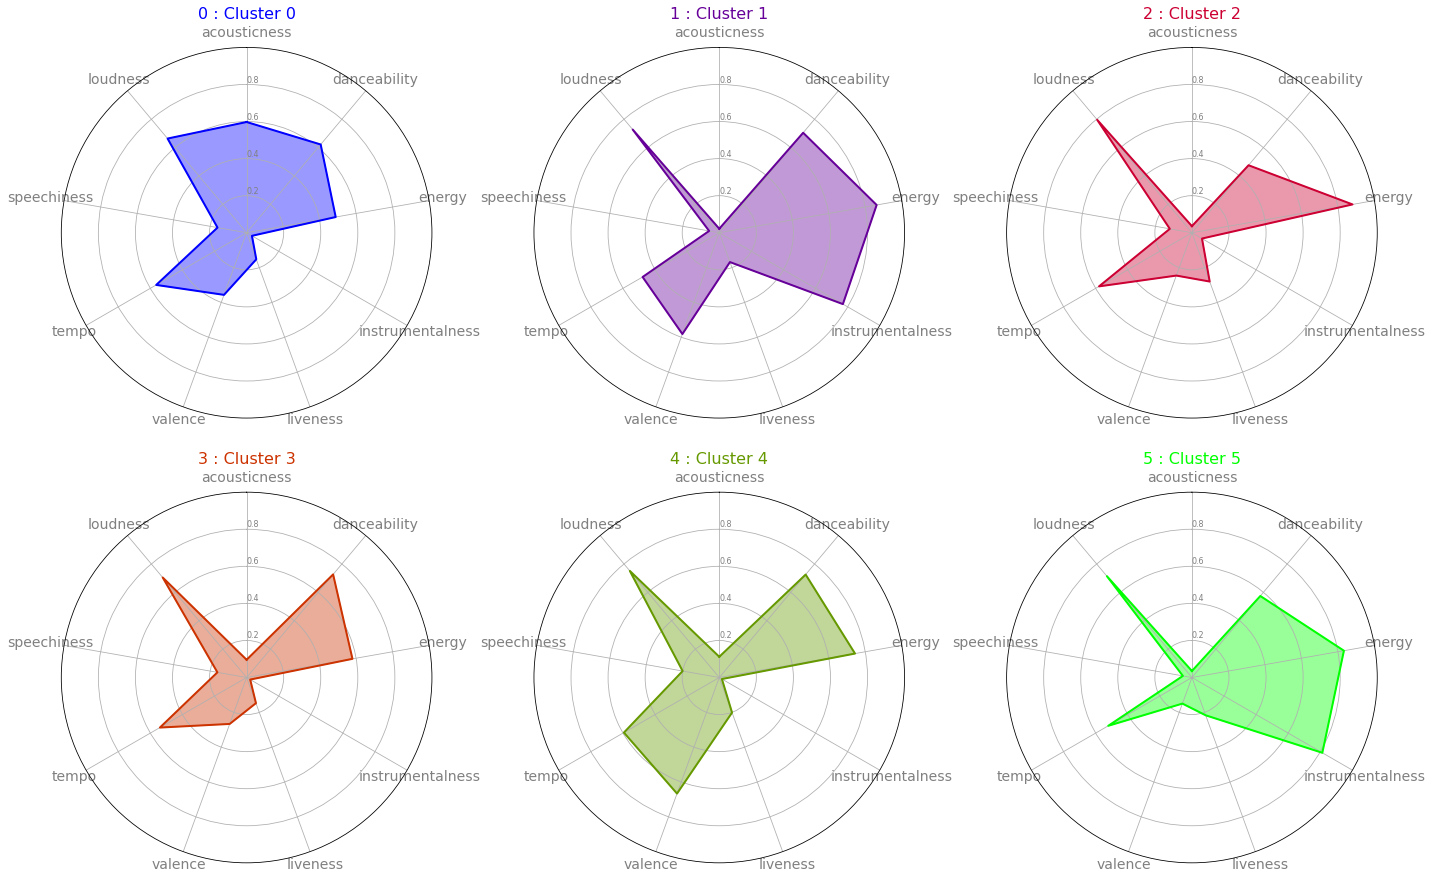

In [118]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))
save_plot("radar_base")

In [129]:
genres_clusters = pd.DataFrame(
    {
        "cluster": spotify_scaled_df['cluster'],
        "label": genres_df
    }
)
genres_clusters

cluster      label
0            3  Dark Trap
1            0  Dark Trap
2            2  Dark Trap
3            2  Dark Trap
4            4  Dark Trap
...        ...        ...
42300        2  hardstyle
42301        2  hardstyle
42302        2  hardstyle
42303        2  hardstyle
42304        2  hardstyle

[42305 rows x 2 columns]

In [150]:
genres_clusters_radar_df = pd.get_dummies(genres_clusters, prefix="", prefix_sep="")
genres_clusters_radar_df = genres_clusters_radar_df.groupby('cluster').sum()
for genre in genres_df.unique():
    genres_clusters_radar_df[genre] = genres_clusters_radar_df[genre] / genres_df_count[genre][0]
genres_clusters_radar_df = genres_clusters_radar_df.reset_index()
genres_clusters_radar_df

cluster  Dark Trap       Emo    Hiphop       Pop       Rap       RnB  \
0        0   0.112713  0.159524  0.151585  0.110629  0.117965  0.222010   
1        1   0.039100  0.004167  0.005614  0.004338  0.000541  0.001906   
2        2   0.166885  0.495238  0.081572  0.132321  0.054113  0.061934   
3        3   0.294233  0.074405  0.220938  0.188720  0.476732  0.276798   
4        4   0.122543  0.263690  0.535007  0.555315  0.346861  0.434016   
5        5   0.264526  0.002976  0.005284  0.008677  0.003788  0.003335   

   Trap Metal  Underground Rap       dnb  hardstyle  psytrance  techhouse  \
0    0.069018         0.119319  0.000674   0.002725   0.000000   0.000336   
1    0.016360         0.009702  0.087660   0.033379   0.210402   0.594622   
2    0.339980         0.074213  0.407620   0.803134   0.027356   0.030588   
3    0.289366         0.402553  0.020229   0.011921   0.005404   0.067899   
4    0.246421         0.383149  0.040121   0.042916   0.004053   0.183866   
5    0.038855         0.011064  0.443695   0.105926   0.752786   0.122689   

     techno    trance      trap  
0  0.000000  0.002001  0.002678  
1  0.162720  0.081027  0.053900  
2  0.008796  0.380460  0.610311  
3  0.010487  0.039680  0.058252  
4  0.004060  0.013338  0.124874  
5  0.813938  0.483494  0.149983

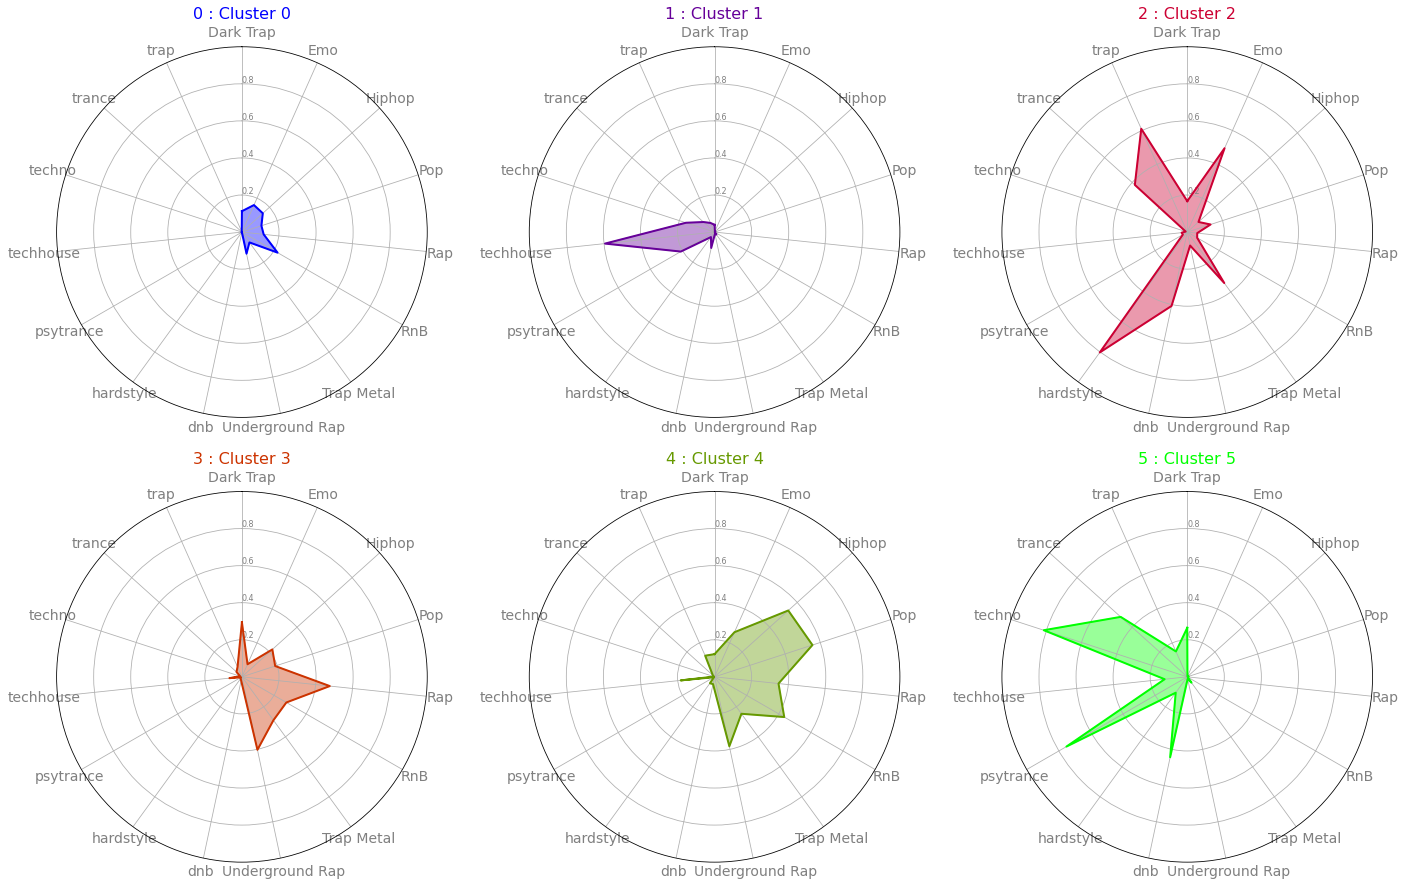

In [151]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(genres_clusters_radar_df.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5']

# Loop to plot
for row in range(0, len(genres_clusters_radar_df.index)):
    make_radar(row=row, title=str(genres_clusters_radar_df['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=genres_clusters_radar_df, num_clusters=len(genres_clusters_radar_df.index))
save_plot("radar_genres_spotify")

In [75]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(spotify_scaled)
pca.explained_variance_ratio_.sum()

0.7280880196824253

In [76]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

C1        C2        C3  cluster
0 -0.313150  0.080022  0.009603        3
1 -0.283807 -0.156189  0.443066        0
2 -0.186678 -0.334127 -0.091191        2
3 -0.205268 -0.327636 -0.026647        2
4 -0.406464  0.232310  0.075619        4

In [77]:
sampled_clusters_pca = pd.DataFrame()

# Обрезаем все кластеры до равного значения экземляров (равняемся по минимальному)
for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    2839
1    2839
2    2839
3    2839
4    2839
5    2839
Name: cluster, dtype: int64

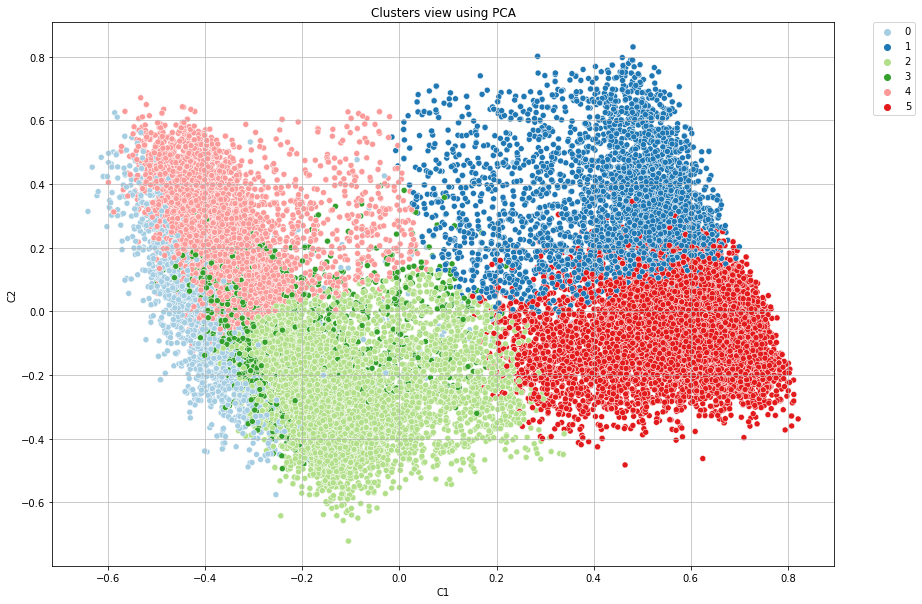

In [83]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_pca , legend="full", palette='Paired', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.grid(alpha=0.8)
save_plot("pca_cluster2d_base")
plt.show()

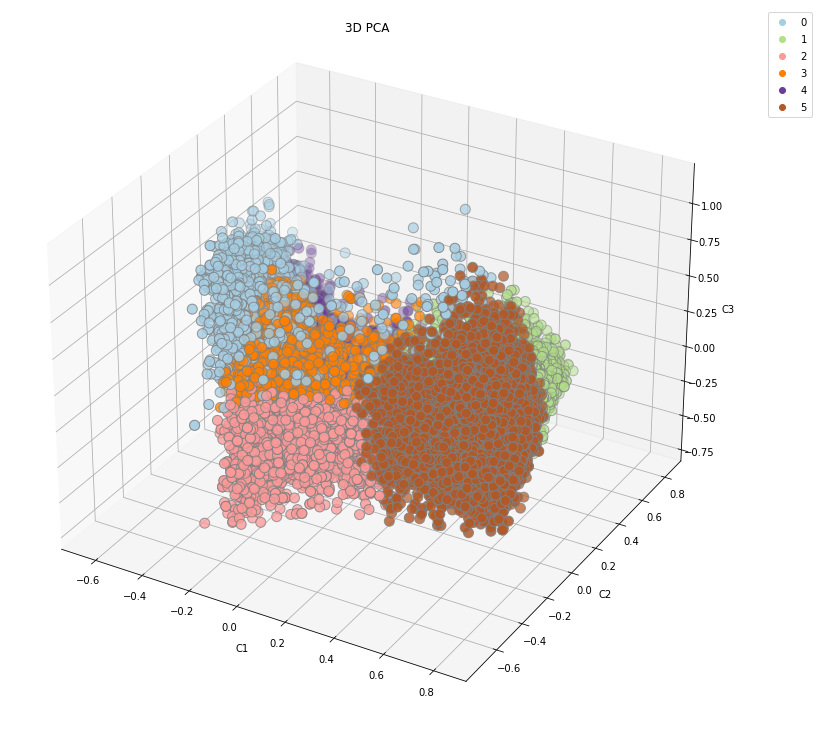

In [93]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D PCA')
ax = Axes3D(fig)

sc = ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired', s=100, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("pca_cluster3d_base")
plt.show()

In [94]:
tsne = TSNE(n_components=3, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(spotify_scaled)

In [95]:
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2', "C3"])
df_tsne['cluster'] = model.labels_
df_tsne.head()

C1         C2         C3  cluster
0   1.837189   8.373034   4.930707        3
1   3.390948  -1.109116  20.109535        0
2  -7.586645  10.623158  11.300189        2
3 -15.230140   2.284771  12.722315        2
4  11.729497   9.843310  10.931758        4

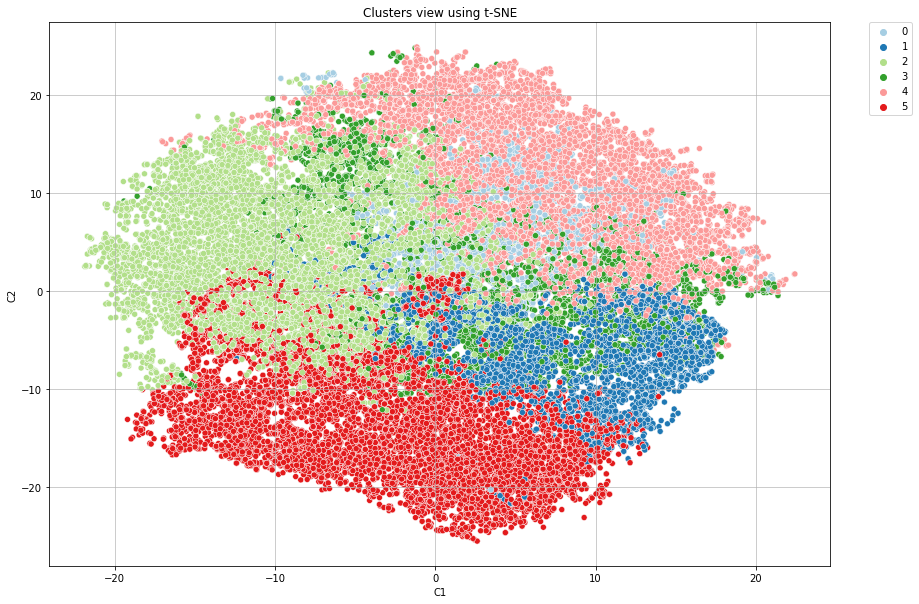

In [99]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_tsne , legend="full", palette='Paired', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using t-SNE')
plt.grid(alpha=0.8)
save_plot("tsne_cluster2d_base")
plt.show()

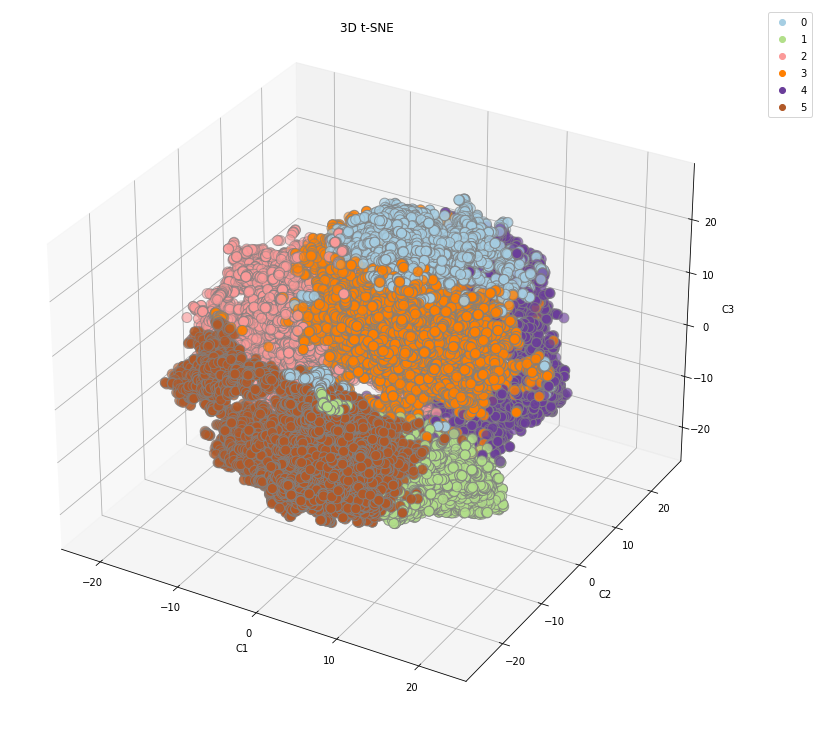

In [97]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D t-SNE')
ax = Axes3D(fig)

sc = ax.scatter(df_tsne['C1'], df_tsne['C2'], df_tsne['C3'],
           c=df_tsne['cluster'], cmap='Paired', s=100, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("tsne_3d_base")
plt.show()

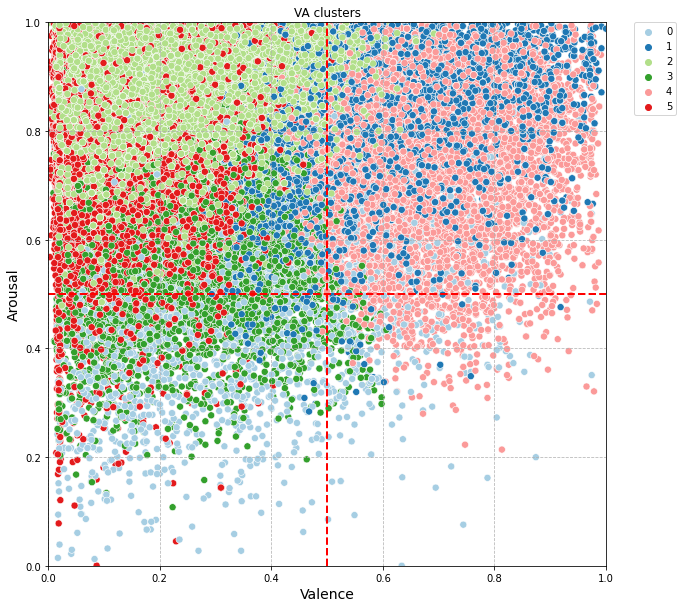

In [117]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x='valence_scaled', y='energy_scaled', hue='cluster', data=spotify_scaled_df[:], legend="full", palette='Paired', ax=ax, s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('VA clusters')
xmin, xmax = plt.xlim(0, 1.0)
ymin, ymax = plt.ylim(0, 1.0)
plt.vlines(0.5, ymin, ymax, linestyle='dashed', colors=["red"], lw=2)
plt.hlines(0.5, xmin, xmax, linestyle='dashed', colors=["red"], lw=2)
plt.grid(alpha=0.9, linestyle='--')
plt.xlabel('Valence', size=14)
plt.ylabel('Arousal', size=14)

save_plot("va_clusters_base")
plt.show()

In [112]:
spotify_scaled_df[spotify_scaled_df["cluster"] == 10]

Empty DataFrame
Columns: [acousticness_scaled, danceability_scaled, energy_scaled, instrumentalness_scaled, liveness_scaled, valence_scaled, tempo_scaled, speechiness_scaled, loudness_scaled, cluster]
Index: []